---
title: "How graph types change the way data is presented"
subtitle: "Comparing different visualizations for the Worldbank population dataset"
author: Marco Dalla Vecchia
date: 12/06/2024
---

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Aesthetics
sns.set_style('ticks')
plt.rcParams["font.family"] = "serif" # use Serif style as default font

In [28]:
# Read list of european countries 
with open('../data/europe-countries.txt', 'r') as f:
    lines = f.readlines()
countries_europe = [line.replace('\n','') for line in lines]

# Import World Bank population data
df = (
    pd.read_csv('../data/API_SP.POP.TOTL_DS2_en_csv_v2_320414/API_SP.POP.TOTL_DS2_en_csv_v2_320414.csv', skiprows=3)
    .drop(columns=['Indicator Code', 'Indicator Name', '2023', 'Unnamed: 68'])
    .melt(id_vars=['Country Name','Country Code'])
    .rename({'Country Name':'country-name', 'Country Code':'country-code', 'variable':'year', 'value': 'population'}, axis=1)
    .assign(year=lambda df_: pd.to_numeric(df_.year))
    .loc[lambda df_: df_['country-name'].isin(countries_europe)]
    .reset_index(drop=True)
)

df

country-name country-code  year  population
0         Albania          ALB  1960   1608800.0
1         Andorra          AND  1960      9443.0
2         Armenia          ARM  1960   1904148.0
3         Austria          AUT  1960   7047539.0
4      Azerbaijan          AZE  1960   3894500.0
...           ...          ...   ...         ...
2704       Serbia          SRB  2022   6664449.0
2705     Slovenia          SVN  2022   2111986.0
2706       Sweden          SWE  2022  10486941.0
2707      Ukraine          UKR  2022  38000000.0
2708       Kosovo          XKX  2022   1761985.0

[2709 rows x 4 columns]

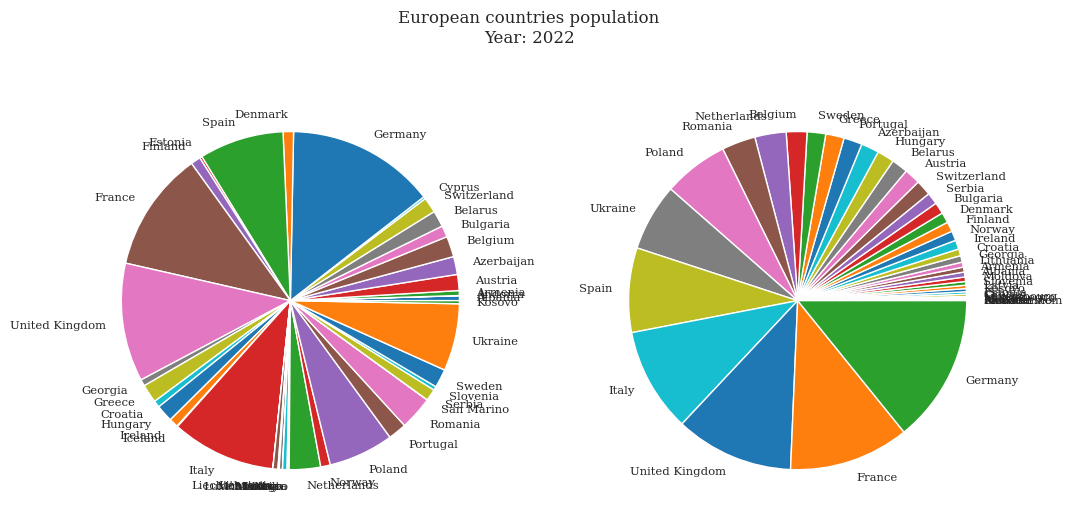

In [29]:
#| label: fig-pies
#| fig-cap: "Pie charts for the visualization of european countries population"

fig, axes = plt.subplots(1,2,figsize=(12,6))
df_2022 = df.loc[lambda df_: df_.year == 2022]
df_2022_sorted = df_2022.sort_values("population")
axes[0].pie(df_2022['population'], labels=df_2022['country-name'], textprops={'size': 'small'})
axes[1].pie(df_2022_sorted['population'], labels=df_2022_sorted['country-name'], textprops={'size': 'small'})
fig.suptitle("European countries population\nYear: 2022")
fig.savefig('../figures/pies.pdf', bbox_inches='tight')
plt.show()

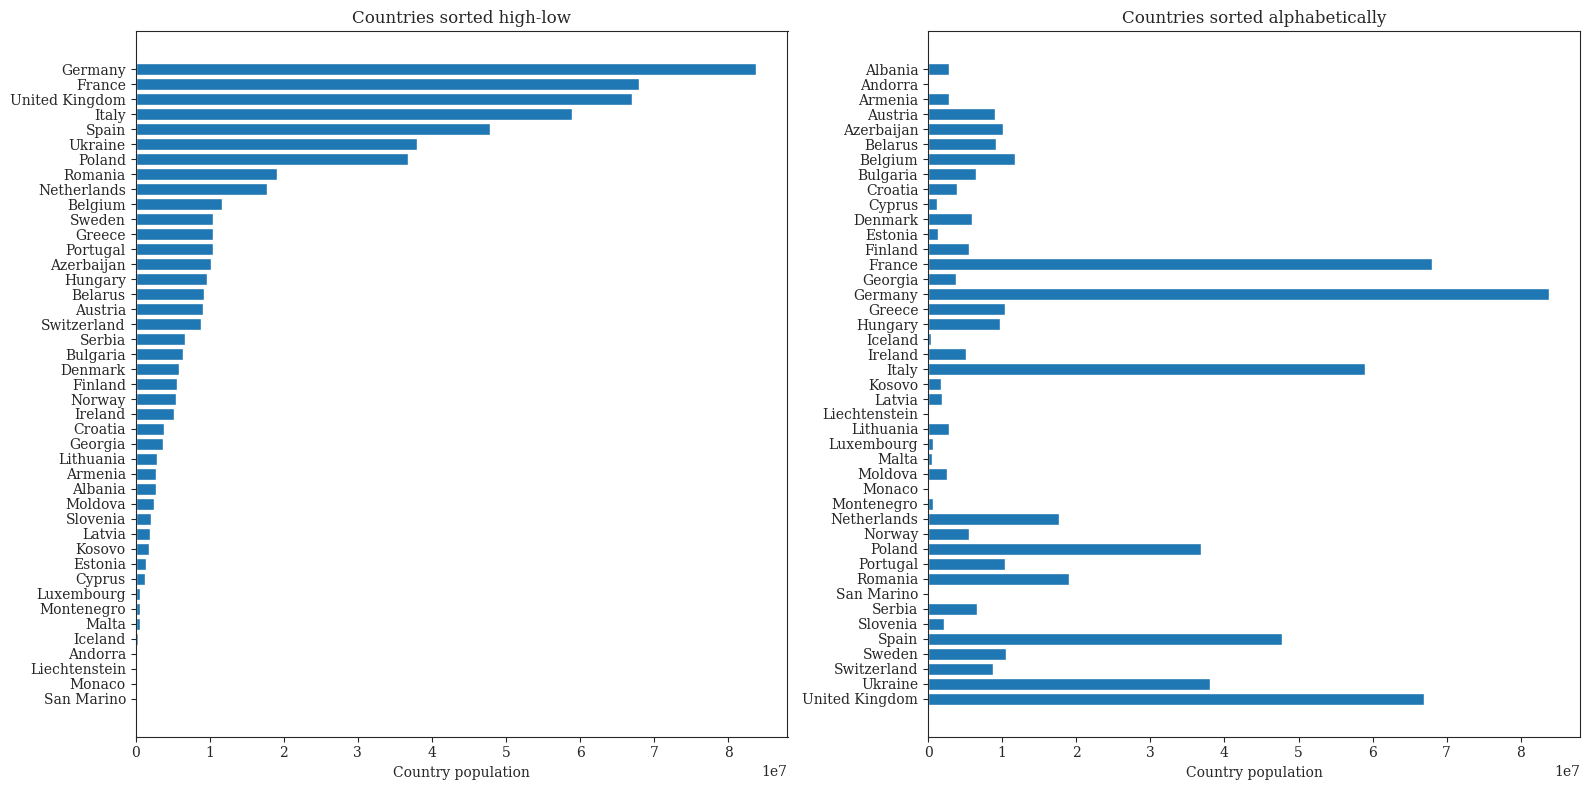

In [30]:
#| label: fig-bars
#| fig-cap: "Bar charts for the visualization of european countries population"

fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].barh(df_2022_sorted['country-name'], df_2022_sorted['population'])
axes[0].set_title("Countries sorted high-low")
df_2022_sorted_alph = df_2022.sort_values("country-name", ascending=False).copy()
axes[1].barh(df_2022_sorted_alph['country-name'], df_2022_sorted_alph['population'])
axes[1].set_title("Countries sorted alphabetically")
for ax in axes:
    ax.set_xlabel("Country population")
plt.tight_layout()
fig.savefig('../figures/bar-sorting.pdf', bbox_inches='tight')
plt.show()

In [23]:
top_5_countries = ['Germany','France', 'United Kingdom', 'Italy','Spain']
df_heatmap = (
    df
    .loc[
        lambda df_: 
            (df_['country-name'].isin(top_5_countries)) & 
            (df_['year'].isin(np.linspace(1960, 2022, 5, dtype=int)))
        ]
    .drop(columns='country-code')
    .pivot(index='country-name', columns='year', values='population')
    .copy()
)

df_heatmap

year                  1960        1975        1991        2006        2022
country-name                                                              
France          46649927.0  53715733.0  58557577.0  63628261.0  67971311.0
Germany         72814900.0  78673554.0  80013896.0  82376451.0  83797985.0
Italy           50199700.0  55441001.0  56758521.0  58143979.0  58940425.0
Spain           30455000.0  35757900.0  38966376.0  44397319.0  47778340.0
United Kingdom  52400000.0  56225800.0  57424897.0  60846820.0  66971395.0

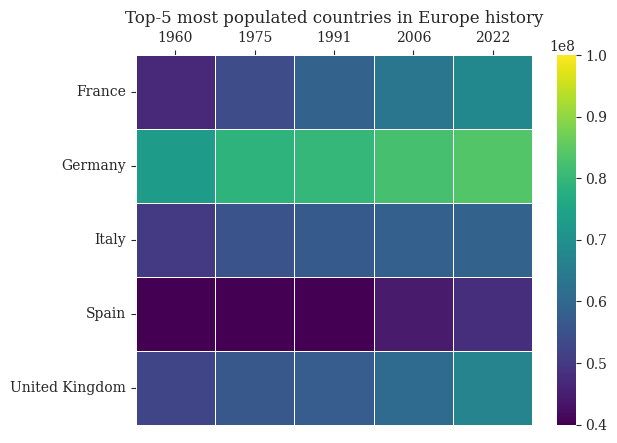

In [24]:
#| label: fig-heatmap
#| fig-cap: "Heatmap for the visualization of european countries population in different years"

ax = sns.heatmap(df_heatmap, linewidth=.5, vmin=4e7, vmax=10e7, cmap='viridis')
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.set_title("Top-5 most populated countries in Europe history")
fig.savefig('../figures/heatmap.pdf', bbox_inches='tight')
plt.show()

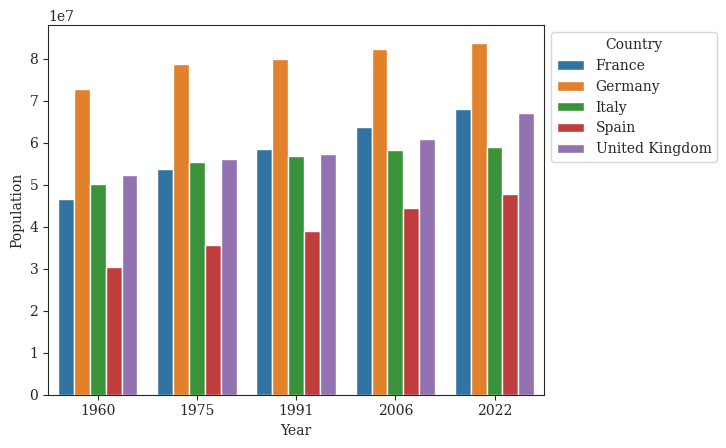

In [25]:
#| label: fig-barsyears
#| fig-cap: "Barplot for the visualization of european countries population in different years"

df_barplot = (
    df
    .loc[
        lambda df_: 
            (df_['country-name'].isin(top_5_countries)) &
            (df_['year'].isin(np.linspace(1960, 2022, 5, dtype=int)))
        ]
    .drop(columns='country-code')
    .sort_values('country-name')
)

ax = sns.barplot(data=df_barplot, x='year', y='population', hue='country-name')
ax.set(xlabel="Year", ylabel='Population')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Country')
plt.savefig('../figures/bars-time.pdf', bbox_inches='tight')
plt.show()

/home/mdallave/miniconda3/envs/data-viz/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mdallave/miniconda3/envs/data-viz/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mdallave/miniconda3/envs/data-viz/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mdallave/miniconda3/envs/data-viz/lib/python3.11/site-packages/seaborn/

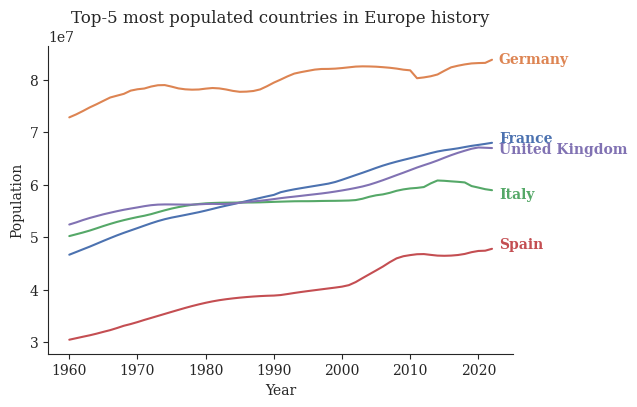

In [26]:
#| label: fig-lines
#| fig-cap: "Lineplot for the visualization of european countries population in different years"

df_lineplot = (
    df
    .loc[
        lambda df_: 
            (df_['country-name'].isin(top_5_countries))
        ]
    .drop(columns='country-code')
    .sort_values('country-name')
)

np.random.seed(100)

fig, ax = plt.subplots(1,figsize=(6,4))
sns.lineplot(data=df_lineplot, x='year', y='population', hue='country-name', palette='deep', legend=False)

for (label, group_df), color in zip(df_lineplot.groupby('country-name'), sns.color_palette('deep', 5)):
    y_pos = group_df.loc[lambda df_: df_['year'] == 2022]['population'].values[0] + np.random.randint(-1e6, 1e6)
    x_pos = 2023
    ax.text(x_pos, y_pos, label, va='center', color=color, fontweight='bold')

ax.set_title("Top-5 most populated countries in Europe history")
ax.set(xlabel="Year", ylabel='Population')
sns.despine()
fig.savefig('../figures/lines-time.pdf', bbox_inches='tight')
plt.show()